In [2]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()
countvect = vector.fit_transform(corpus)
# 코퍼스로부터 각 단어의 빈도수를 기록
print(countvect.toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)


[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [3]:
import pandas as pd
countvect_df = pd.DataFrame(countvect.toarray(), columns=sorted(vector.vocabulary_))
countvect_df.index = ["문서1", "문서2", "문서3"]
print(countvect_df)

     do  know  like  love  should  want  what  you  your
문서1   0     1     0     1       0     1     0    1     1
문서2   0     0     1     0       0     0     0    1     0
문서3   1     0     0     0       1     0     1    0     0


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)

array([[1.        , 0.31622777, 0.        ],
       [0.31622777, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfvect = vect.fit(corpus)
tfidv_df = pd.DataFrame(tfvect.transform(corpus).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = ['문서1', '문서2', '문서3']
tfidv_df

,do,know,like,love,should,want,what,you,your
문서1,0.00000,0.467351,0.000000,0.467351,0.00000,0.467351,0.00000,0.355432,0.467351
문서2,0.00000,0.000000,0.795961,0.000000,0.00000,0.000000,0.00000,0.605349,0.000000
문서3,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.000000


In [7]:
cosine_similarity(tfidv_df, tfidv_df)

array([[1.        , 0.21516051, 0.        ],
       [0.21516051, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [8]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]

In [15]:
cvect = CountVectorizer()
dtm = cvect.fit_transform(corpus)
print(dtm.toarray())
dtm

[[0 1 1 0 1 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 1 0 0 0 0 0 1 0 1 0 2 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0]]


<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [11]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [12]:
cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [14]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [16]:
df_dtm.sum()

거리두기     1
거리두기와    1
문의입니다    6
버스       2
상생지원금    1
선별진료소    1
승강장      2
안내입니다    2
요금       1
운행시간     1
운행시간과    1
위치       1
지하철      3
코로나      4
택시       1
터미널      1
dtype: int64

In [17]:
"""Ngram"""
cvect = CountVectorizer(ngram_range=(1, 2))
dtm = cvect.fit_transform(corpus)
dtm

<8x36 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [18]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
df_dtm

,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,...,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,...,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [19]:
df_dtm.sum()

거리두기           1
거리두기 안내입니다     1
거리두기와          1
거리두기와 코로나      1
문의입니다          6
버스             2
버스 운행시간        1
버스 터미널         1
상생지원금          1
상생지원금 문의입니다    1
선별진료소          1
선별진료소 문의입니다    1
승강장            2
승강장 문의입니다      2
안내입니다          2
요금             1
요금 문의입니다       1
운행시간           1
운행시간 문의입니다     1
운행시간과          1
운행시간과 지하철      1
위치             1
위치 안내입니다       1
지하철            3
지하철 승강장        1
지하철 요금         1
지하철 운행시간과      1
코로나            4
코로나 거리두기       1
코로나 거리두기와      1
코로나 상생지원금      1
코로나 선별진료소      1
택시             1
택시 승강장         1
터미널            1
터미널 위치         1
dtype: int64

In [22]:
def display_transform_dtm(cvect, corpus):
    """모델을 받아 변환을 하고 문서 용어 행렬을 반환하는 함수"""
    dtm = cvect.fit_transform(corpus)
    df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
    print(df_dtm.shape)
    return df_dtm.style.background_gradient()

In [23]:
display_transform_dtm(cvect, corpus)

(8, 36)


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [24]:
tfidfvect = TfidfVectorizer()

dtm = tfidfvect.fit_transform(corpus)
tfidfvect = TfidfVectorizer()
display_transform_dtm(tfidfvect, corpus)

(8, 16)


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.000000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.751070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.000000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [25]:
idf = tfidfvect.idf_
idf

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [26]:
vocab = tfidfvect.get_feature_names_out()
vocab
idf_dict = dict(zip(vocab, idf))
idf_dict

{'거리두기': 2.504077396776274,
 '거리두기와': 2.504077396776274,
 '문의입니다': 1.251314428280906,
 '버스': 2.09861228866811,
 '상생지원금': 2.504077396776274,
 '선별진료소': 2.504077396776274,
 '승강장': 2.09861228866811,
 '안내입니다': 2.09861228866811,
 '요금': 2.504077396776274,
 '운행시간': 2.504077396776274,
 '운행시간과': 2.504077396776274,
 '위치': 2.504077396776274,
 '지하철': 2.09861228866811,
 '코로나': 1.8109302162163288,
 '택시': 2.504077396776274,
 '터미널': 2.504077396776274}

<Axes: >

/Users/jinwoo/Desktop/TextMining/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/Users/jinwoo/Desktop/TextMining/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/Users/jinwoo/Desktop/TextMining/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  func(*args, **kwargs)
/Users/jinwoo/Desktop/TextMining/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/Users/jinwoo/Desktop/TextMining/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  func(*args, **kwargs)
/Users/jinwoo/Deskt

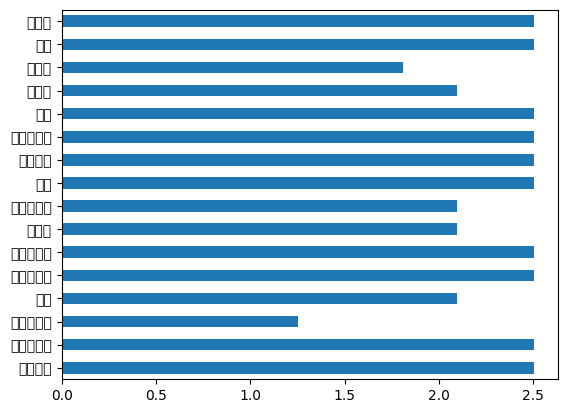

In [27]:
pd.Series(idf_dict).plot.barh()